In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import time

In [2]:
df = pd.read_csv("2_letter_recognition.data")

In [3]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [4]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(label_encoder.classes_), activation='softmax')
])

In [8]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
start_time = time.time()
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.1, verbose=0)
end_time = time.time()
print("Training time :",end_time-start_time)

Training time : 19.031107425689697


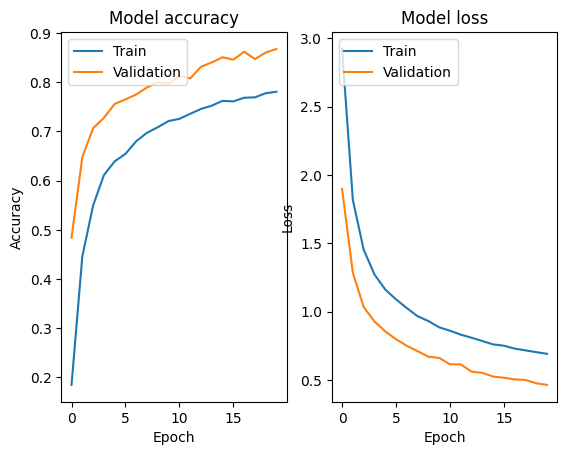

In [10]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

125/125 [==============================] - 1s 3ms/step - loss: 0.4688 - accuracy: 0.8620
Test Loss: 0.46881231665611267, Test Accuracy: 0.8619999885559082


In [12]:
def classify_new_input(new_input, model, label_encoder):
    start_time = time.time() 
    new_input = np.array(new_input).reshape(1, -1)
    prediction = model.predict(new_input)
    predicted_class = label_encoder.inverse_transform([np.argmax(prediction)])
    prediction_time = time.time() - start_time
    return predicted_class[0], prediction_time

In [13]:
df.head(40)

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
5,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
6,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
7,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
8,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8
9,X,3,9,5,7,4,8,7,3,8,5,6,8,2,8,6,7


In [16]:
def get_user_input():
    user_input = input("Enter 16 integers separated by commas (e.g., 3,6,4,4,2,4,14,8,1,11,6,3,0,10,4,8): ")
    new_input = list(map(int, user_input.split(',')))
    
    return new_input

new_input = get_user_input()
predicted_class, pred_time = classify_new_input(new_input, model, label_encoder)

print("Predicted Class:", predicted_class)
print("Prediction Time:", pred_time, "seconds")

Enter 16 integers separated by commas (e.g., 3,6,4,4,2,4,14,8,1,11,6,3,0,10,4,8): 1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
1/1 [==============================] - 6s 6s/step
Predicted Class: A
Prediction Time: 10.334893465042114 seconds
